In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('OnlineRetail.csv')

In [ ]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
data.dropna(inplace=True)

<Axes: >

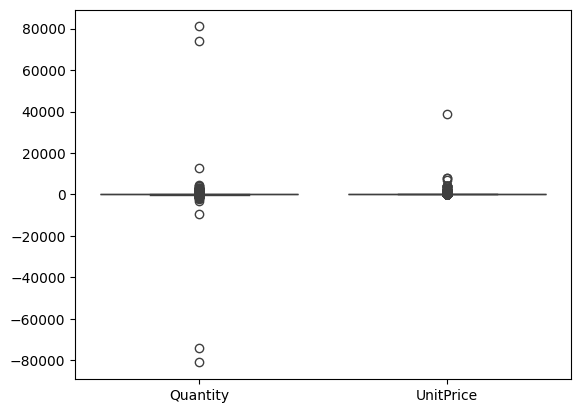

In [ ]:
sns.boxplot(data=data[['Quantity', 'UnitPrice']])

In [ ]:
from scipy import stats
z_scores = stats.zscore(data[['Quantity', 'UnitPrice']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Quantity', 'UnitPrice']])

In [ ]:
clusters_range = range(2, 11)
inertia = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

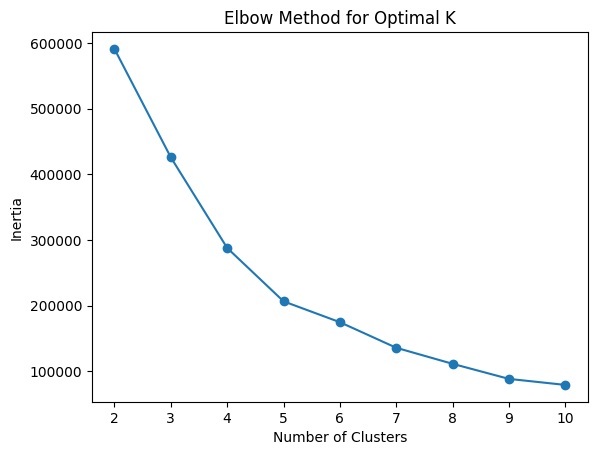

In [ ]:
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


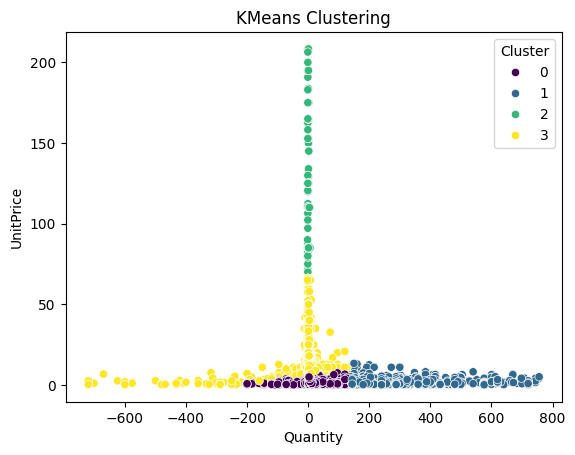

In [ ]:
optimal_n_clusters = 4
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=data, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


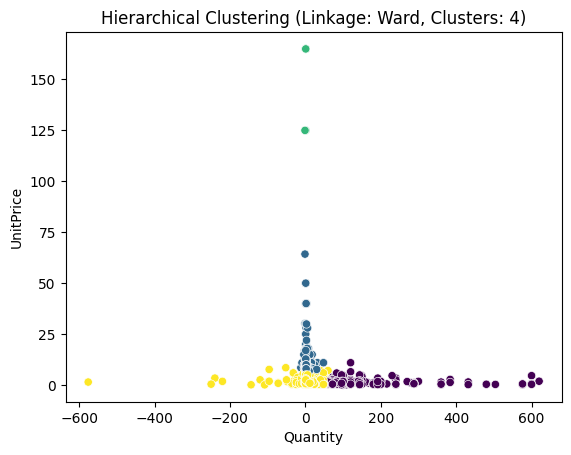

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import random
sample_size = 10000
if len(data) > sample_size:
    data = data.sample(sample_size, random_state=42)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Quantity', 'UnitPrice']])
n_clusters = 4  #
linkage_method = 'ward'
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
model.fit(scaled_data)
data['Cluster'] = model.labels_
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=data, palette='viridis', legend=False)
plt.title(f'Hierarchical Clustering (Linkage: {linkage_method.capitalize()}, Clusters: {n_clusters})')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

<Figure size 1200x600 with 0 Axes>

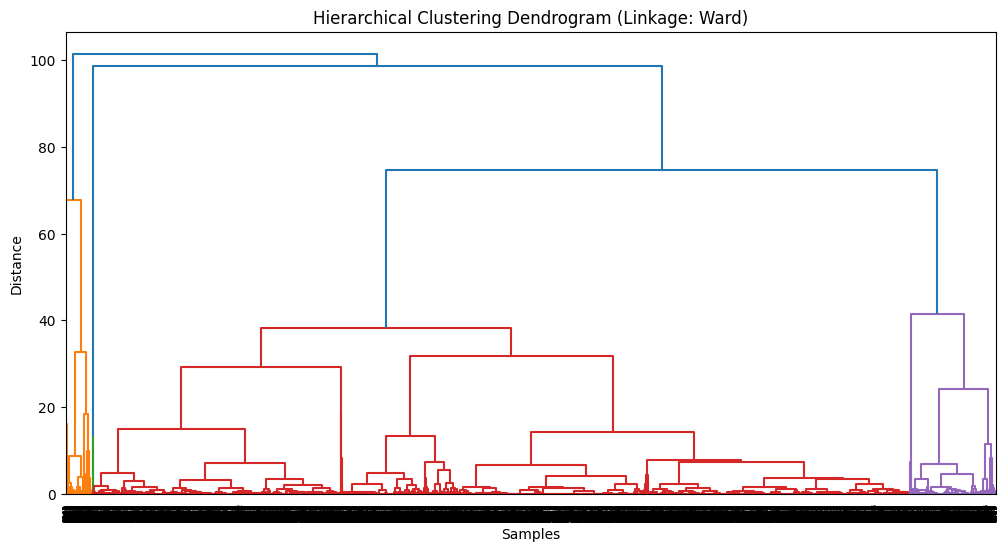

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(12, 6))
linkage_method = 'ward'
Z = linkage(scaled_data, method=linkage_method)
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title(f'Hierarchical Clustering Dendrogram (Linkage: {linkage_method.capitalize()})')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()#RAM WAS CRASHING SO ISUED ONLY 1000 samples

In [ ]:
#hierarchical clustering is used for its interpretability and capacity to uncover hierarchical relationships within the data.However, K-means is better due to its simplicity, scalability, and faster computing.